In [81]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

In [82]:
# load data

y_m, sr_m = librosa.load(
    'c:/nmb/nmb_data/주형.wav'
) # 남성 음성
y_f, sr_f = librosa.load(
    'c:/nmb/nmb_data/영리.wav'
) # 여성 음성

print(len(y_m))
print(sr_m)
print(len(y_m)/sr_m)

110250
22050
5.0


In [83]:
# melspectogram
# mel_to_stft 하기 전 데이터를 melspectrogram 화 시켜야한다

stft_m = np.abs(librosa.stft(y_m))
S_m = librosa.feature.melspectrogram(y_m, sr = sr_m)

stft_DB_m = librosa.amplitude_to_db(stft_m, ref = np.max)
S_DB_m = librosa.amplitude_to_db(S_m, ref = np.max)

stft_f = np.abs(librosa.stft(y_f))
S_f = librosa.feature.melspectrogram(y_f, sr = sr_f)

stft_DB_f = librosa.amplitude_to_db(stft_f, ref = np.max)
S_DB_f = librosa.amplitude_to_db(S_f, ref = np.max)

In [84]:
print('stft_m : \n', stft_m)
print('S_m : \n', S_m)
print('S_DB_m : \n', S_DB_m)
print('stft_f : \n', stft_f)
print('S_f : \n', S_f)
print('S_DB_f : \n', S_DB_f)

stft_m : 
 [[3.1016961e-01 1.6282943e-01 1.2460112e-02 ... 3.0105990e-01
  1.6000864e-01 2.7848178e-01]
 [2.2040813e-01 1.9253959e-01 1.9660348e-02 ... 1.3442008e-01
  2.6187268e-01 4.0751499e-01]
 [2.2766449e-01 2.8520238e-01 1.5068023e-01 ... 2.8733429e-01
  2.1420544e-01 5.8647680e-01]
 ...
 [3.9756743e-04 1.8489975e-04 2.4952649e-04 ... 2.7058349e-04
  2.2017206e-04 8.7252280e-05]
 [4.1037943e-04 2.6876462e-04 1.8940253e-04 ... 3.4118921e-04
  3.7337843e-04 3.2449319e-04]
 [5.7530071e-04 3.7118353e-04 1.2301896e-05 ... 1.7921480e-04
  2.1444120e-04 5.6943286e-04]]
S_m : 
 [[2.3061415e-02 3.1724542e-02 2.8032187e-02 ... 4.6426684e-01
  4.3415955e-01 2.9915267e-01]
 [2.0762546e-02 6.1743185e-02 8.5781217e-02 ... 9.2936468e-01
  1.0508398e+00 1.0738442e+00]
 [3.8495909e-03 7.7233864e-03 1.2647195e-02 ... 6.2741941e-01
  3.4044755e-01 9.0077192e-01]
 ...
 [1.1502652e-07 1.9783710e-07 1.9029220e-07 ... 4.9038135e-06
  1.7172011e-06 1.4903928e-06]
 [7.5740324e-08 8.8245045e-08 7.0315558e

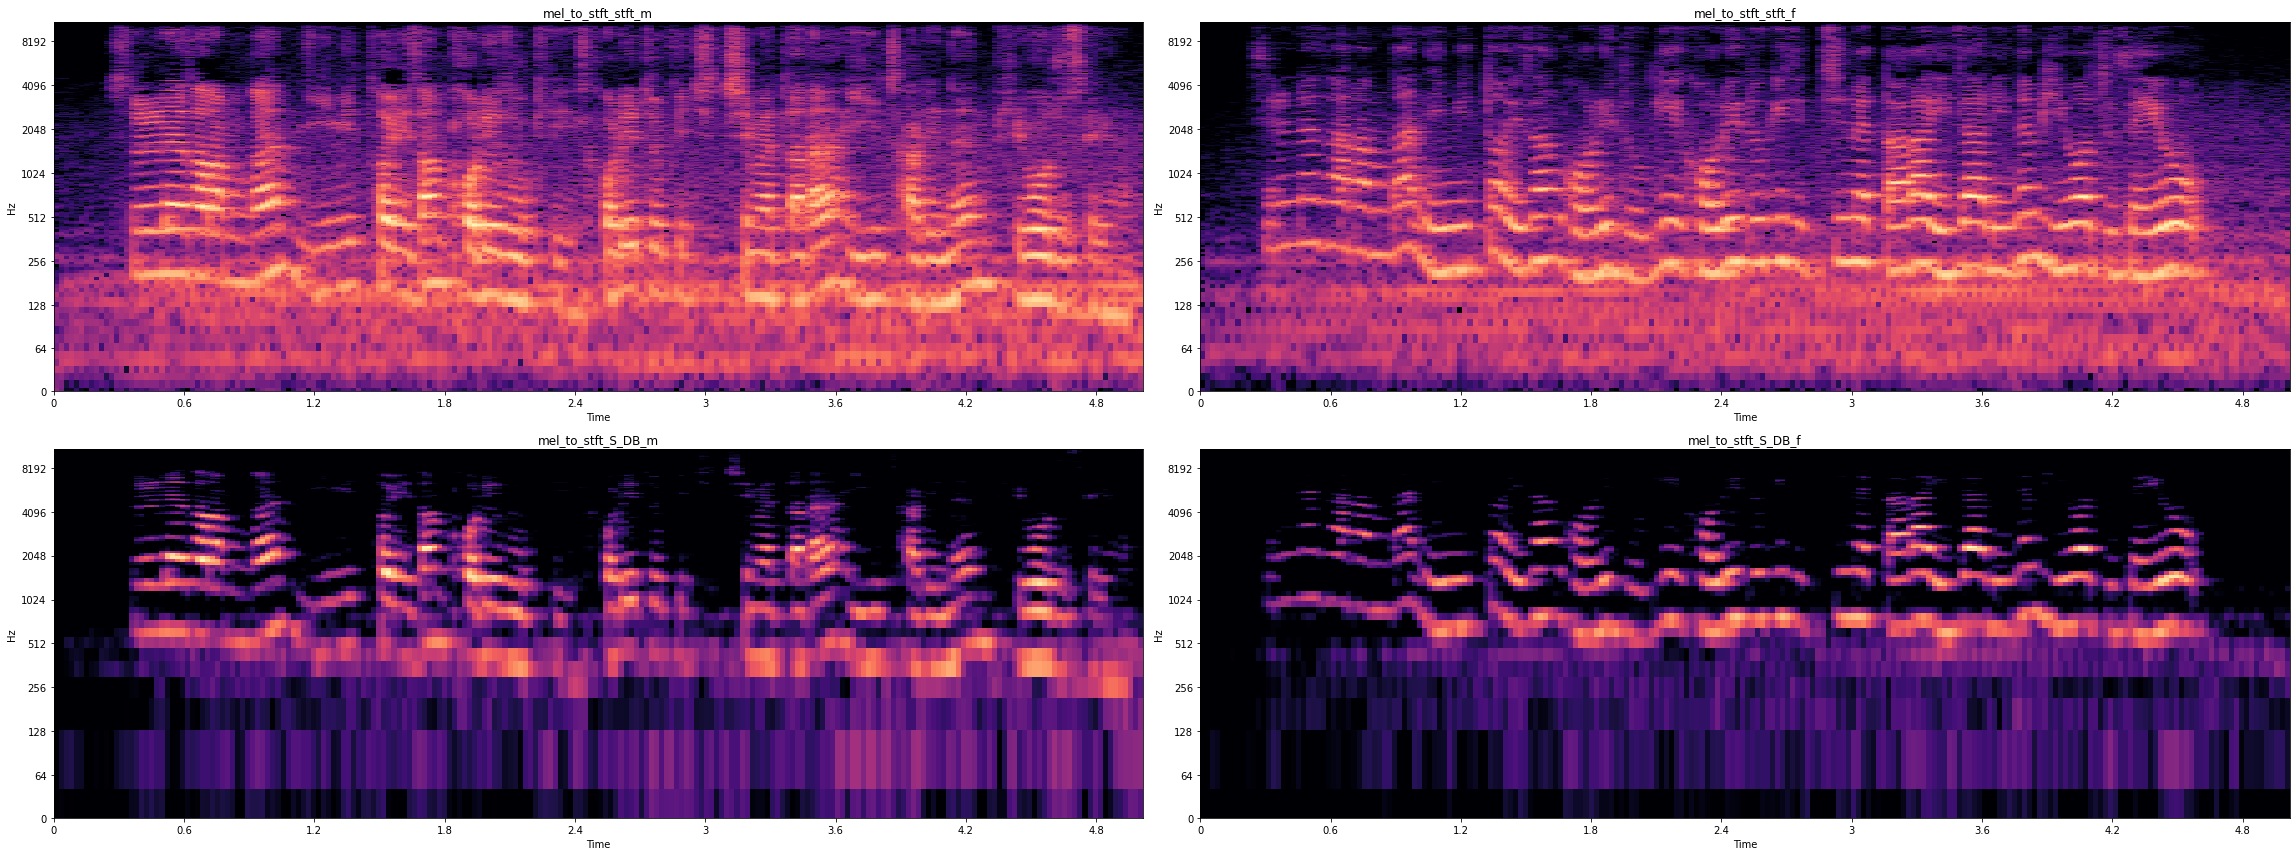

In [90]:
fig = plt.figure(figsize = (32, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
librosa.display.specshow(
    stft_DB_m, x_axis = 'time', y_axis = 'log', ax = ax1
)
ax1.set(title = 'mel_to_stft_stft_m')
librosa.display.specshow(
    stft_DB_f, x_axis = 'time', y_axis = 'log', ax = ax2
)
ax2.set(title = 'mel_to_stft_stft_f')
librosa.display.specshow(
    S_DB_m, x_axis = 'time', y_axis = 'log', ax = ax3
)
ax3.set(title = 'mel_to_stft_S_DB_m')
librosa.display.specshow(
    S_DB_f, x_axis = 'time', y_axis = 'log', ax = ax4
)
ax4.set(title = 'mel_to_stft_S_DB_f')
fig.tight_layout()
plt.show()

In [93]:
# inverse.mel_to_stft

mts_m = librosa.feature.inverse.mel_to_stft(
    stft_m,
    sr = sr_m,
    n_fft = 512, # 사람 음성의 경우 512 가 추천된다
    power = 4.0
)

mts_f = librosa.feature.inverse.mel_to_stft(
    stft_f,
    sr = sr_f,
    n_fft = 512,
    power = 4.0
)

mts_DB_m = librosa.amplitude_to_db(
    mts_m, ref = np.max
)

mts_DB_f = librosa.amplitude_to_db(
    mts_f, ref = np.max
)

In [87]:
# data check

print('mts_m : \n', mts_m)
print('mts_f : \n', mts_f)

mts_m : 
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.98863626 1.6985582  1.879696   ... 5.3993354  4.5323105  4.6874638 ]
 [1.6385341  1.5454292  1.0117114  ... 3.564086   2.244523   1.768009  ]
 ...
 [0.11923103 0.08437289 0.1026101  ... 0.12779205 0.1298554  0.10743426]
 [0.16068009 0.13043897 0.02310388 ... 0.08971348 0.09871336 0.15885465]
 [0.         0.         0.         ... 0.         0.         0.        ]]
mts_f : 
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.8175501  1.2196982  0.83067256 ... 6.448736   5.8801064  4.586329  ]
 [0.6875756  1.2678103  1.2334223  ... 3.2464352  3.2550552  3.1234736 ]
 ...
 [0.10954554 0.03978269 0.05837775 ... 0.08003803 0.10387794 0.21319787]
 [0.11183764 0.10334445 0.11070462 ... 0.03089842 0.08825894 0.20196493]
 [0.         0.         0.         ... 0.         0.         0.        ]]


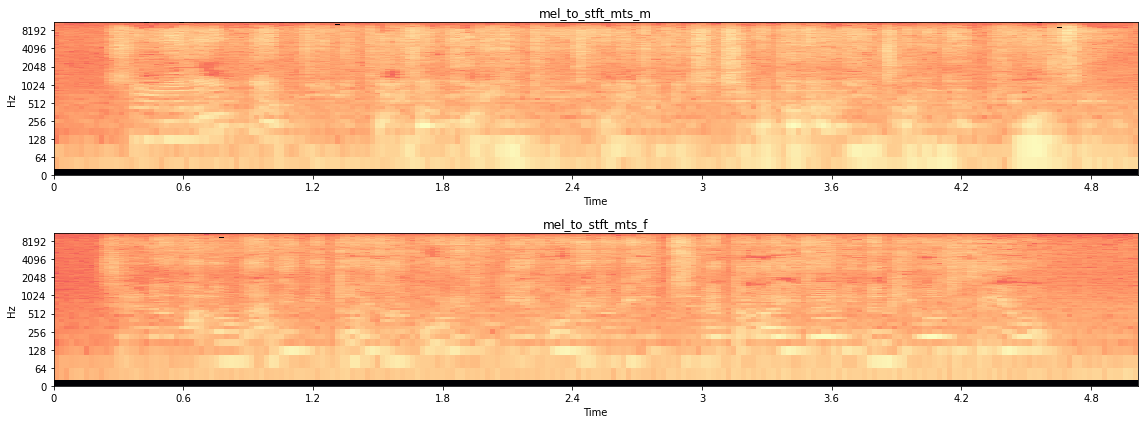

In [94]:
fig = plt.figure(figsize = (16, 6))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

librosa.display.specshow(
    mts_DB_m, x_axis = 'time', y_axis = 'log', ax = ax1
)
ax1.set(title = 'mel_to_stft_mts_m')

librosa.display.specshow(
    mts_DB_f, x_axis = 'time', y_axis = 'log', ax = ax2
)
ax2.set(title = 'mel_to_stft_mts_f')

fig.tight_layout()
plt.show()

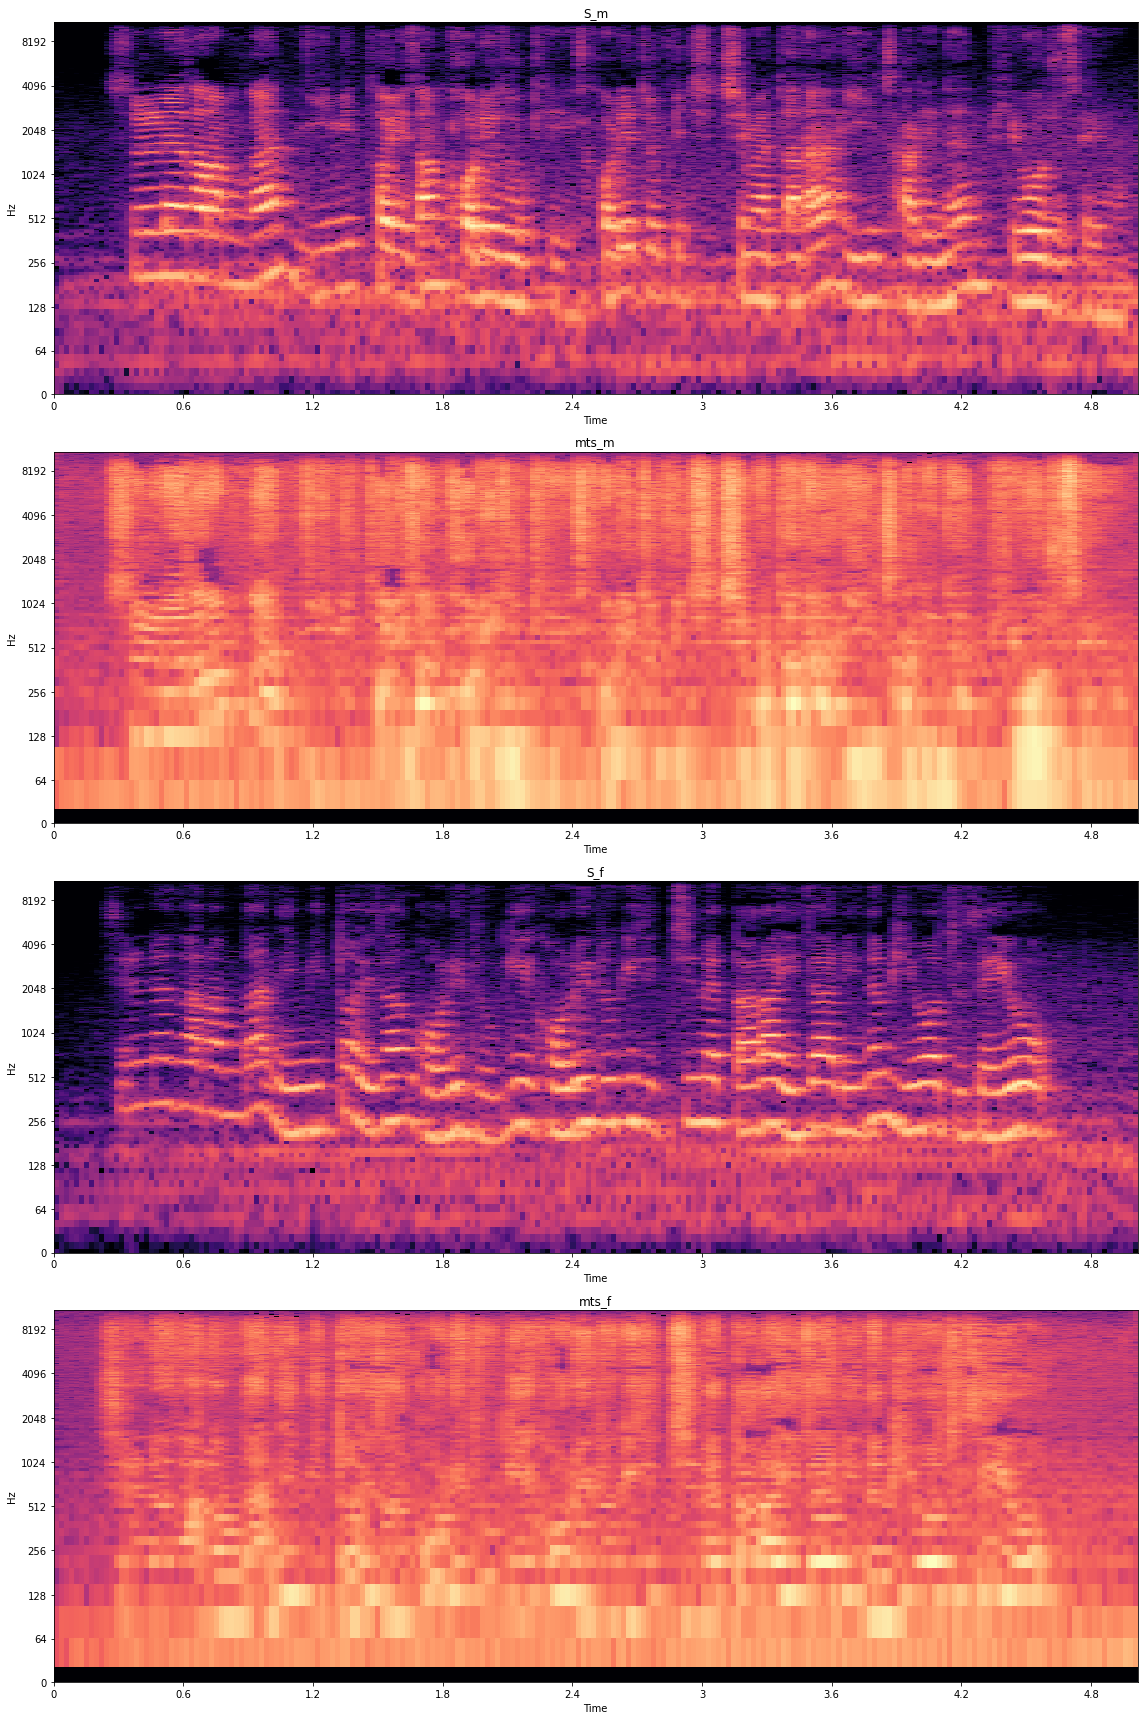

In [89]:
fig = plt.figure(figsize = (16, 24))
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)

librosa.display.specshow(
    stft_DB_m, x_axis = 'time', y_axis = 'log', ax = ax1
)
ax1.set(title = 'S_m')

librosa.display.specshow(
    mts_DB_m, x_axis = 'time', y_axis = 'log', ax = ax2
)
ax2.set(title = 'mts_m')

librosa.display.specshow(
    stft_DB_f, x_axis = 'time', y_axis = 'log', ax = ax3
)
ax3.set(title = 'S_f')

librosa.display.specshow(
    mts_DB_f, x_axis = 'time', y_axis = 'log', ax = ax4
)
ax4.set(title = 'mts_f')
fig.tight_layout()
plt.show()